<a href="https://colab.research.google.com/github/Deepak262/18CSE172/blob/main/dmdw_lab_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [1]:
path = "https://raw.githubusercontent.com/Deepak262/18CSE172/main/diabetes.csv"

In [2]:
import pandas as pd

In [3]:
pip install metrics

     |████████████████████████████████| 849kB 5.7MB/s 
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17815 sha256=fc5b14161b537df9ed4c916f32fd26ad203c17c05fc26b9ac23e4a86a178e8a5
  Stored in directory: /root/.cache/pip/wheels/38/e8/55/c4c648451a33a60920318eba4c5735088dbf78dc20d4277db0
  Created wheel for pathspec: filename=pathspec-0.5.5-cp36-none-any.whl size=24229 sha256=1a5befd973b879ac9b0634afeda083e802899b3eb979269580f7b4b4816f8e1b
  Stored in directory: /root/.cache/pip/wheels/d1/2e/6b/c67842adf3b13ea33ca3fe6a2a963622821ad647db724688e2
Successfully built metrics pathspec
ERROR: jupyterlab-pygments 0.1.2 has requirement pygments<3,>=2.4.1, but you'll have pygments 2.2.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [6]:
data=pd.read_csv(path)

In [7]:
df = data

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
feature_cols=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [10]:
x=df[feature_cols]
y=df.Outcome

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
663            9      145             80  ...  37.9                     0.637   40
712           10      129             62  ...  41.2                     0.441   38
161            7      102             74  ...  37.2                     0.204   45
509            8      120             78  ...  25.0                     0.409   64
305            2      120             76  ...  39.7                     0.215   29
..           ...      ...            ...  ...   ...                       ...  ...
645            2      157             74  ...  39.4                     0.134   30
715            7      187             50  ...  33.9                     0.826   34
72            13      126             90  ...  43.4                     0.583   42
235            4      171             72  ...  43.6                     0.479   26
37             9      102             76  ...  32.9                     0.665   46

[61

In [13]:
print(x_test)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
285            7      136             74  ...  26.0                     0.647   51
101            1      151             60  ...  26.1                     0.179   22
581            6      109             60  ...  25.0                     0.206   27
352            3       61             82  ...  34.4                     0.243   46
726            1      116             78  ...  36.1                     0.496   25
..           ...      ...            ...  ...   ...                       ...  ...
563            6       99             60  ...  26.9                     0.497   32
318            3      115             66  ...  38.1                     0.150   28
154            8      188             78  ...  47.9                     0.137   43
684            5      136             82  ...   0.0                     0.640   69
643            4       90              0  ...  28.0                     0.610   31

[15

In [14]:
clf=DecisionTreeClassifier()    #object for classifier

In [15]:
clf=clf.fit(x_train,y_train)

In [16]:
y_pred=clf.predict(x_test)

In [17]:
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7207792207792207


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


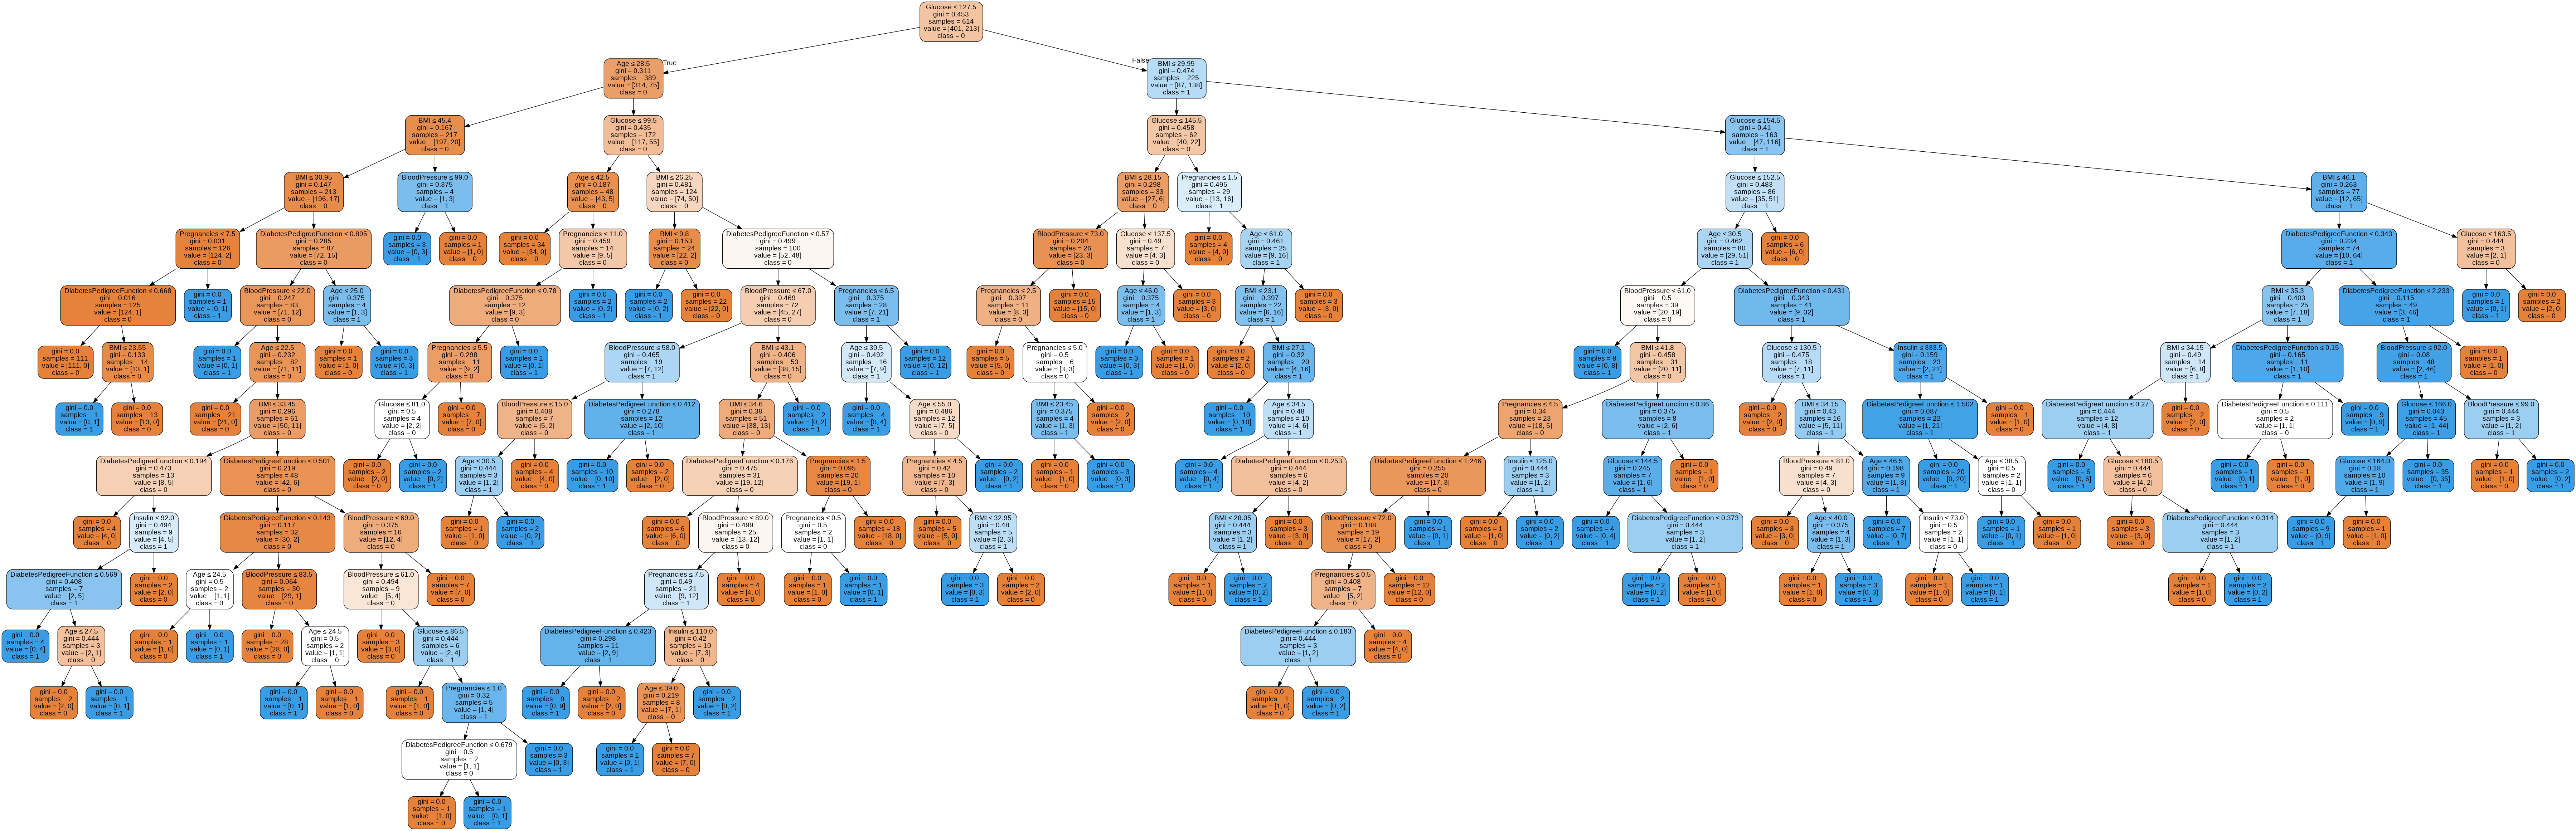

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())